<a href="https://colab.research.google.com/github/AI4Finance-Foundation/ElegantRL/blob/master/tutorial_BipedalWalker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BipedalWalker-v3 Example in ElegantRL**






# **Part 1: Testing Task Description**

[BipedalWalker-v3](https://gym.openai.com/envs/BipedalWalker-v2/) is a robotic task in OpenAI Gym since it performs one of the most fundamental skills: moving. In this task, our goal is to make a 2D biped walker to walk through rough terrain. BipedalWalker is a difficult task in continuous action space, and there are only a few RL implementations can reach the target reward.

# **Part 2: Install ElegantRL**

In [1]:
# install elegantrl library
!pip install git+https://github.com/AI4Finance-LLC/ElegantRL.git

  Cloning https://github.com/AI4Finance-LLC/ElegantRL.git to /tmp/pip-req-build-djcx1xlf
  Running command git clone -q https://github.com/AI4Finance-LLC/ElegantRL.git /tmp/pip-req-build-djcx1xlf
     |████████████████████████████████| 89.3 MB 27 kB/s 
     |████████████████████████████████| 448 kB 46.3 MB/s 
  Created wheel for elegantrl: filename=elegantrl-0.3.2-py3-none-any.whl size=81836 sha256=328fa95e6e93636986a9bcf39e37cc0a049a54870907fe7b23e56c561533f481
  Stored in directory: /tmp/pip-ephem-wheel-cache-onsk16wv/wheels/52/9a/b3/08c8a0b5be22a65da0132538c05e7e961b1253c90d6845e0c6
Successfully built elegantrl


# **Part 3: Import Packages**


*   **elegantrl**
*   **OpenAI Gym**: a toolkit for developing and comparing reinforcement learning algorithms.
*   **PyBullet Gym**: an open-source implementation of the OpenAI Gym MuJoCo environments.



In [2]:
from elegantrl.train.run_tutorial import *
from elegantrl.train.config import Arguments
from elegantrl.agents.AgentTD3 import AgentTD3
from elegantrl.envs.Gym import build_env
import gym
gym.logger.set_level(40) # Block warning

# **Part 4: Specify Agent and Environment**

*   **args.agent**: firstly chooses one DRL algorithm to use, and the user is able to choose any agent from agent.py
*   **args.env**: creates and preprocesses the environment, and the user can either customize own environment or preprocess environments from OpenAI Gym and PyBullet Gym from env.py.


> Before finishing initialization of **args**, please see Arguments() in run.py for more details about adjustable hyper-parameters.




In [3]:
agent = AgentTD3()  # AgentSAC(), AgentTD3(), AgentDDPG()
env = build_env('BipedalWalker-v3')
args = Arguments(env, agent)

args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5

args.gamma = 0.98
args.target_step = args.env.max_step

# **Part 5: Train and Evaluate the Agent**

> The training and evaluating processes are all finished inside function **train_and_evaluate()**, and the only parameter for it is **args**. It includes the fundamental objects in DRL:

*   agent,
*   environment.

> And it also includes the parameters for training-control:

*   batch_size,
*   target_step,
*   reward_scale,
*   gamma, etc.

> The parameters for evaluation-control:

*   break_step,
*   random_seed, etc.






In [4]:
train_and_evaluate(args) # the training process will terminate once it reaches the target reward.

| Remove cwd: ./AgentTD3_BipedalWalker-v3_(0,)
################################################################################
ID     Step    maxR |    avgR   stdR   avgS  stdS |    expR   objC   etc.
0  3.20e+03 -112.02 |
0  3.20e+03 -112.02 | -112.02    0.1    116     5 |    0.16   0.01  -0.00
0  9.76e+04  -91.61 |
0  9.76e+04  -91.61 |  -91.61    1.3    118    11 |    0.26   0.00   0.18
0  1.54e+05  -62.80 |
0  1.54e+05  -62.80 |  -62.80   21.6   1283   598 |    0.18   0.15   1.41
0  1.90e+05  -48.06 |
0  1.90e+05  -48.06 |  -48.06   37.6   1189   571 |    0.20   0.10   1.70
0  2.24e+05  -48.06 |  -62.24   32.5    439   496 |    0.16   0.18   2.83
0  2.59e+05  -48.06 |  -80.75   25.9   1000   618 |    0.24   0.14   1.18
0  2.90e+05  -48.06 |  -90.59   25.0    784   635 |    0.18   0.16   0.11
0  3.18e+05  -42.94 |
0  3.18e+05  -42.94 |  -42.94   46.0    411   249 |    0.22   0.15   2.06
0  3.44e+05   56.58 |
0  3.44e+05   56.58 |   56.58  129.9    666   433 |    0.25   0.14  -0.84


Understanding the above results::
*   **Step**: the total training steps.
*  **MaxR**: the maximum reward.
*   **avgR**: the average of the rewards.
*   **stdR**: the standard deviation of the rewards.
*   **objA**: the objective function value of Actor Network (Policy Network).
*   **objC**: the objective function value (Q-value)  of Critic Network (Value Network).

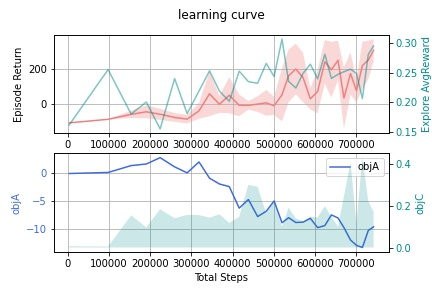

In [34]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(f"/content/{args.cwd}/plot_learning_curve.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
